# Sign Language Classification

The American Sign Language MNIST Dataset we are going to use is obtained from [Kaggle](https://www.kaggle.com/datamunge/sign-language-mnist). This dataset is much like the original MNIST dataset. Each training and test case consists of a numerical label (0–25) with a one-to-one correspondence to the English alphabet (0 corresponds to A) and a grayscale 28x28 pixel image with values ranging from 0–255. However, there is no label correspondence to the letter J (9) and Z (25) due to the motion required to symbolize those letters. The number of testing and training cases in this dataset are much lower compared to the orginal MNIST dataset since there are only 27,455 training cases and 7,172 tests cases in this dataset.

<img src="images/sign_language.png" width=700 height=700 />

In this problem we are going to implement a simple multi-class classification model to classify each image to its desired label. For downloading the dataset, use this [link](https://www.kaggle.com/datamunge/sign-language-mnist).

In [ ]:
import os
import string

train_dataset = pd.read_csv('datasets/sign-dataset/sign_mnist_train/sign_mnist_train.csv')
test_dataset = pd.read_csv('datasets/sign-dataset/sign_mnist_test/sign_mnist_test.csv')
num_rows = train_dataset.shape[0]
# To map each label number to its corresponding letter
letters = dict(enumerate(string.ascii_uppercase))

Now it is the time foe data exploration! The first few rows of the training datast are shown below:

In [ ]:
train_dataset.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


We need to separate the pixel values and the label from each other in order for us to load and access it separately. A function was constructed to split the training and testing dataset to separate the labels from the pixel values.

In [ ]:
def dataframe_to_array(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1.iloc[:, 1:].to_numpy()
    targets_array = dataframe1['label'].to_numpy()
    return inputs_array, targets_array

In [ ]:
X_train, y_train = dataframe_to_array(train_dataset)
X_train = np.float32(X_train)
y_train = np.float32(y_train)
X_test, y_test = dataframe_to_array(test_dataset)
X_test = np.float32(X_test)
y_test = np.float32(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(27455, 784) (27455,)
(7172, 784) (7172,)


Let’s look at the first row of the training dataset. We also need to reshape the array to (28x28) since the initial shape is just a row array.

Letter:  D


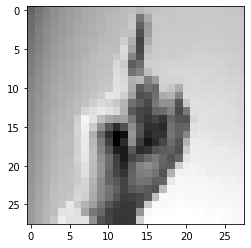

In [ ]:
pic1 = np.reshape(X_train[0], (28, 28))
plt.imshow(pic1, cmap = "gray")
print("Letter: ", letters[y_train[0].item()])

As expected, the letter in the hand image is D. However, it is evident that the image is not clear due to its small resolution. This may affect the accuracy of our model and the implementation of the model in a much larger scale.

The training and testing input arrays are converted to continuous float values since it allows our model for a more precise learning as compared to discrete values. On the other hand, the training and testing labels are converted to long integers since the output of the model are indices to be used in accessing probability values.

## `SimpleLogisticRegression` class.


In [ ]:
from sklearn.linear_model import LogisticRegression

############# Your code here ############
#normalising
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_test  -= mean_image
#fit
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#accuracy
test_accuracy = 100.0 * np.mean(y_pred == y_test)
print("Test accuracy = %.2f" % test_accuracy)
#########################################

Test accuracy = 66.86


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Multi-label classification metrics.
Next metric we used in below cell is a confusion matrix. It's a 23x23 shaped matrix (nmber of classes) and it shows us how many datas have been predicted for each class and whether it was a right prediction or wrong one. We can where our model exceeds and where it fails and also using this we can measure recall and percision which we talked about in class.

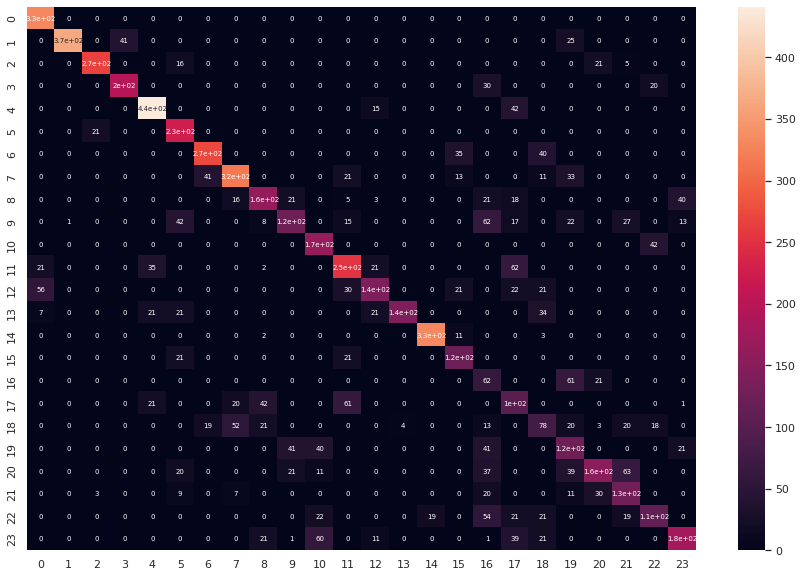

In [ ]:
############# Your code here ############
from sklearn.metrics import confusion_matrix
import seaborn as sn

df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(24), range(24))
sn.set(rc={'figure.figsize':(15,10)})
sn.heatmap(df_cm, annot=True, annot_kws={"size": 7})

plt.show()
#########################################

# 3. Submission

Please read the notes here carefully:

1. The more beautiful and insightfull your plots and diagrams are, the more points you get. So please take your time and concentration to prepare a good report with nice diagrams.

2. The file you upload must be named as `[Student ID]-[Your name].zip` and it must contain **only 1 file**:

  - `Linear_and_Logistic_Regression.ipynb`
  
4. **Important Note**: The outputs of the code blocks must be remained in your notebook, otherwise, you definitly lose all the points of that 


  
In case you have any questions, contact **mohammad99hashemi@gmail.com**.